In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
titanic = pd.read_csv('../data/tested.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
titanic = titanic.drop(columns=['PassengerId','Cabin','Name','Ticket'],axis=1)

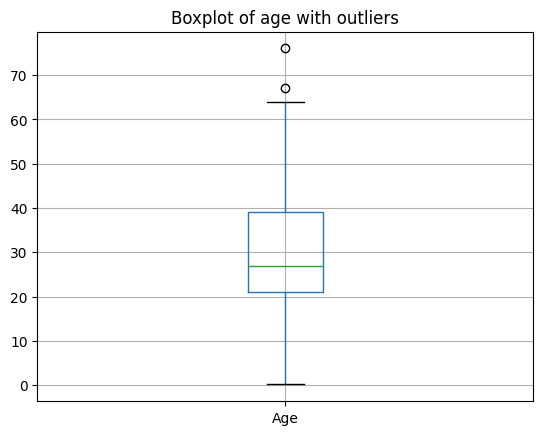

In [10]:
titanic.boxplot(column=['Age'])
plt.title('Boxplot of age with outliers')
plt.show()

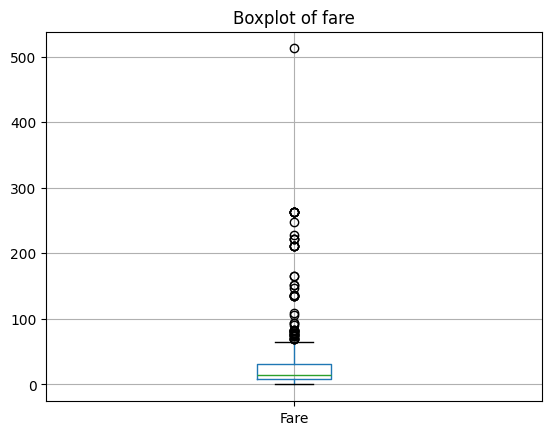

In [11]:
titanic.boxplot(column=['Fare'])
plt.title('Boxplot of fare')
plt.show()

In [12]:
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)
titanic['Fare'].fillna(titanic['Fare'].median(),inplace =True)

/var/folders/05/16tm42991snf6c27rs7nssdh0000gn/T/ipykernel_3817/958661273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(),inplace=True)
/var/folders/05/16tm42991snf6c27rs7nssdh0000gn/T/ipykernel_3817/958661273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [13]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
titanic['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [16]:
titanic['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [17]:
titanic['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

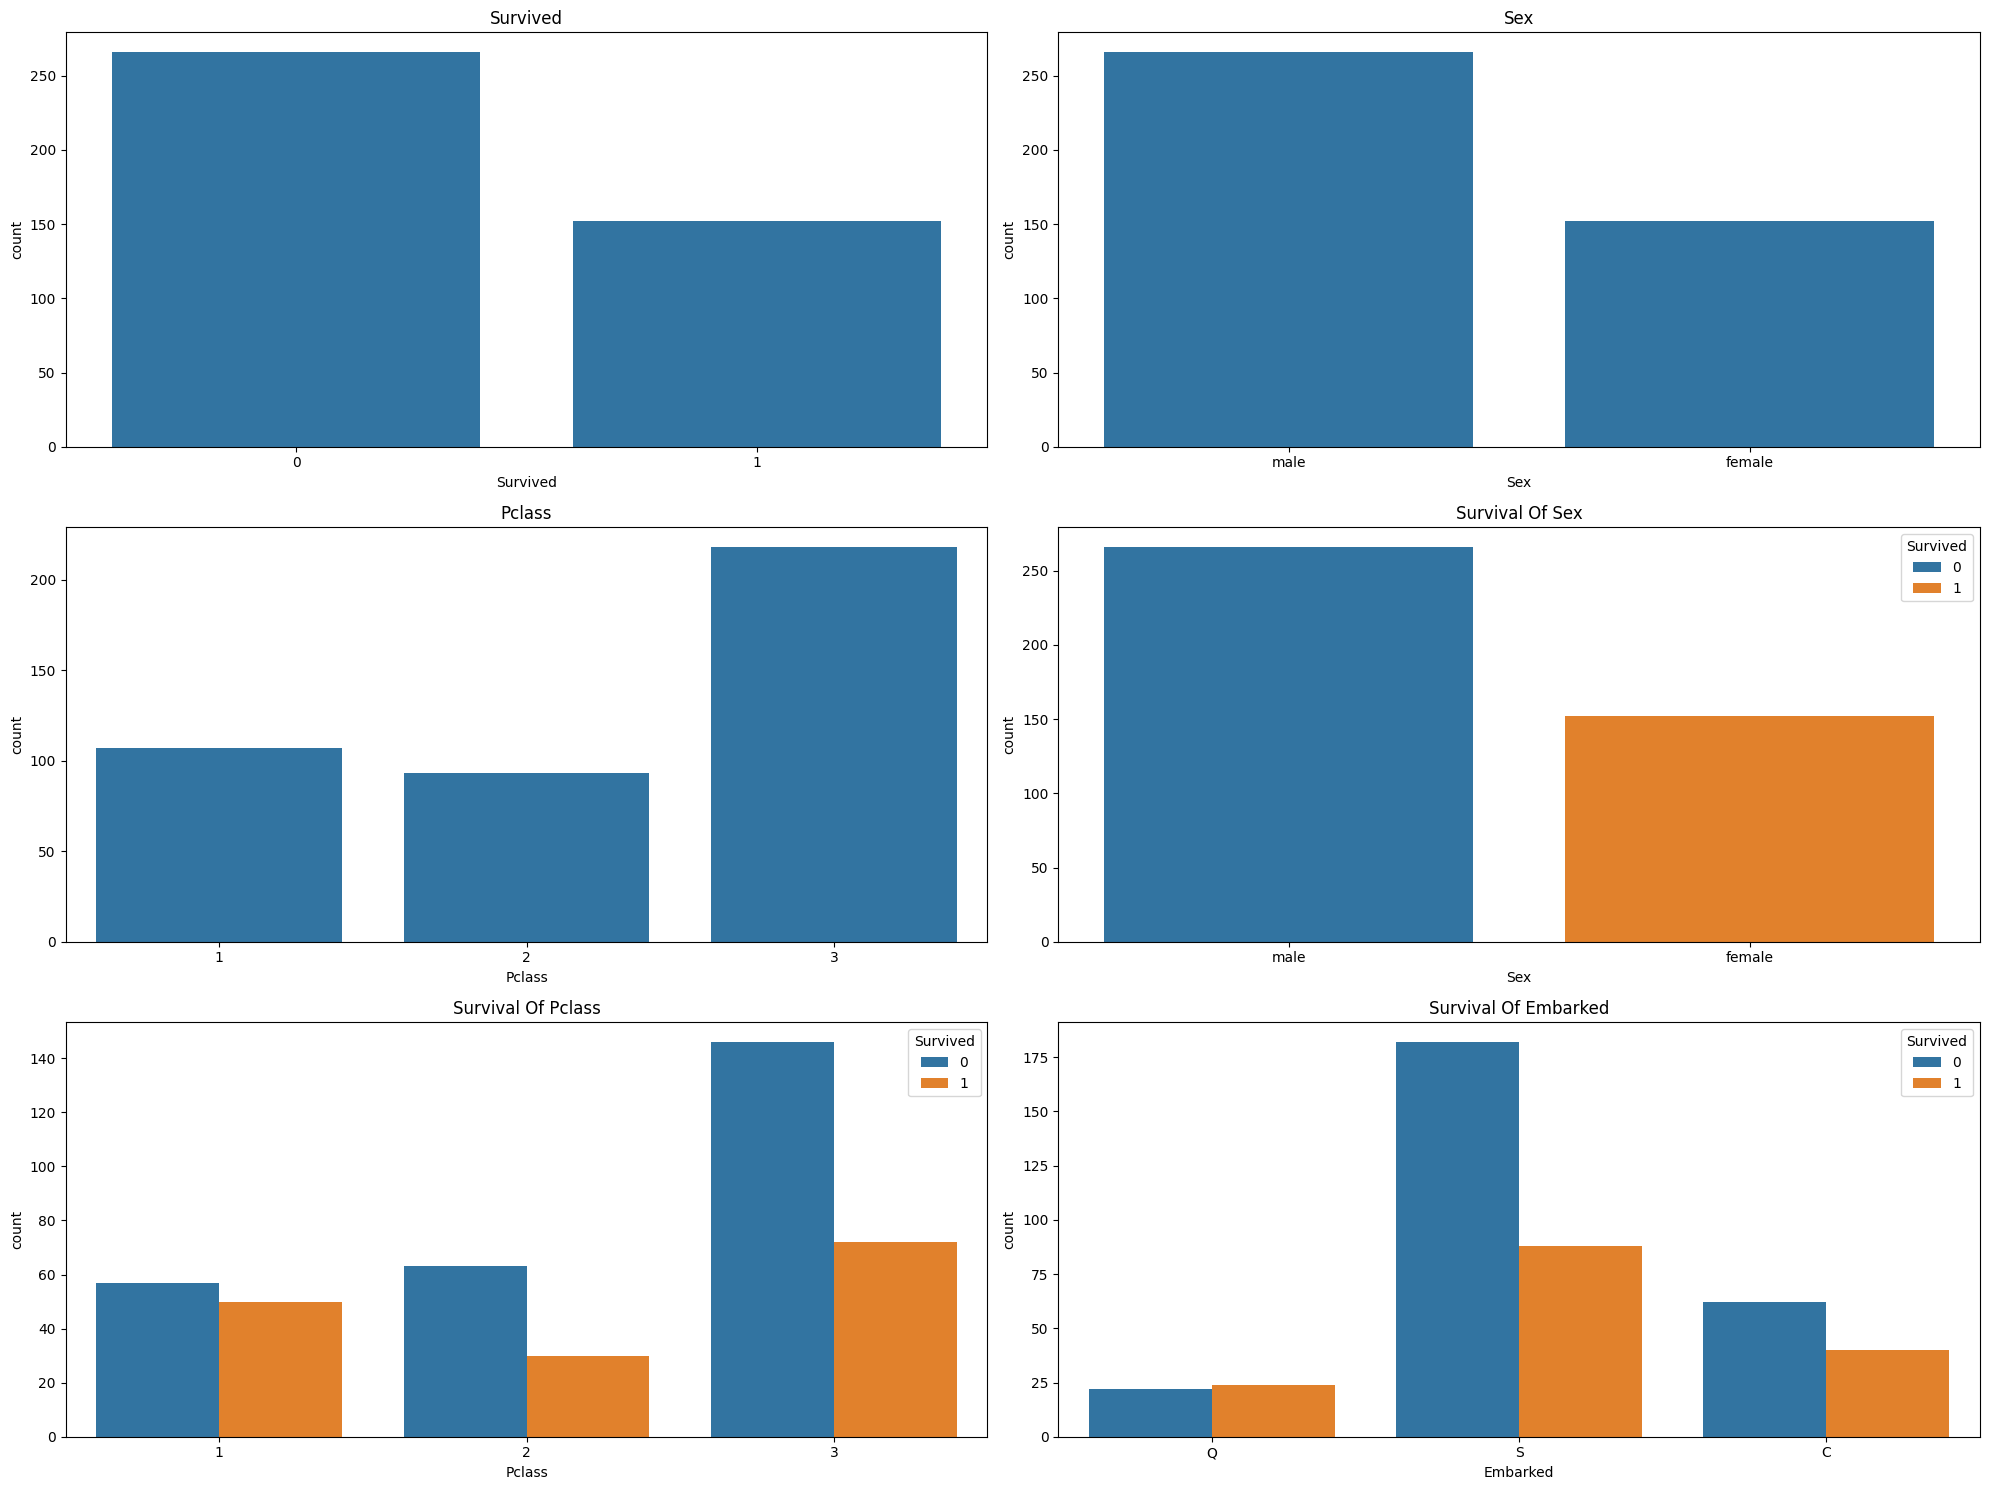

In [18]:
fix, axes = plt.subplots(nrows=3,ncols=2,figsize=(20,15))
axes = axes.flatten()

sns.countplot(x='Survived', data=titanic, ax=axes[0])
axes[0].set_title('Survived')

sns.countplot(x='Sex', data=titanic, ax=axes[1])
axes[1].set_title('Sex')

sns.countplot(x='Pclass', data=titanic, ax=axes[2])
axes[2].set_title('Pclass')

sns.countplot(x='Sex', hue='Survived', data=titanic, ax=axes[3])
axes[3].set_title('Survival Of Sex')

sns.countplot(x='Pclass', hue='Survived', data=titanic, ax=axes[4])
axes[4].set_title('Survival Of Pclass')

sns.countplot(x='Embarked',hue='Survived',data=titanic,ax=axes[5])
axes[5].set_title('Survival Of Embarked')

plt.tight_layout()
plt.show()

In [19]:
replacements={
    'Sex':{'male':0,'female':1},
    'Embarked':{'S':0,'C':1,'Q':2}
}

titanic.replace(replacements, inplace=True)

# Fill NaN values in 'Embarked' with the mode (0, which corresponds to 'S')
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

/var/folders/05/16tm42991snf6c27rs7nssdh0000gn/T/ipykernel_3817/909516484.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace(replacements, inplace=True)


In [20]:
titanic.iloc[0:9]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0
5,0,3,0,14.0,0,0,9.2250,0
6,1,3,1,30.0,0,0,7.6292,2
7,0,2,0,26.0,1,1,29.0000,0
8,1,3,1,18.0,0,0,7.2292,1


In [21]:
X = titanic.drop(columns=['Survived'])
Y = titanic['Survived']

In [22]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [23]:
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [24]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [25]:
print(X.shape,X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

,priors,None
,var_smoothing,1e-09


In [28]:
#Accuracy
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

print('Training Accuracy:', accuracy_score(Y_train, train_pred_nb))
print('Testing Accuracy:', accuracy_score(Y_test, test_pred_nb))

Training Accuracy: 1.0
Testing Accuracy: 1.0


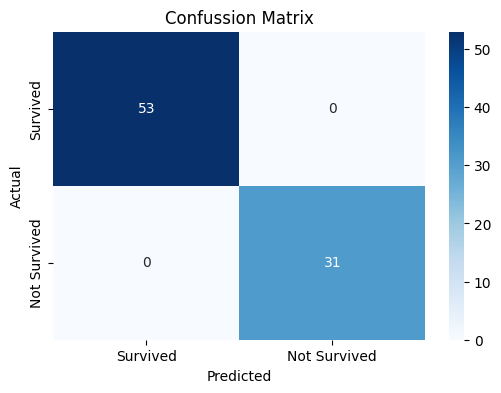

In [29]:
plt.figure(figsize=(6, 4))
cmb_nb = confusion_matrix(Y_test, test_pred_nb)
sns.heatmap(cmb_nb, annot=True, cmap="Blues",
            xticklabels=['Survived', 'Not Survived'],
            yticklabels=['Survived', 'Not Survived'])
plt.title('Confussion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
print('\nClassification report (NB)')
print(classification_report(Y_test,test_pred_nb))


Classification report (NB)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [31]:
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(nb_model,X,Y,cv=5,scoring='accuracy')
print('\nNaive Bayes Cross Validation Accuracy (5-fold):')
print('Scores:',cv_nb)
print('Mean Accuracy : ',cv_nb.mean())
print('Standard Deviation : ',cv_nb.std())


Naive Bayes Cross Validation Accuracy (5-fold):
Scores: [1. 1. 1. 1. 1.]
Mean Accuracy :  1.0
Standard Deviation :  0.0
